In [18]:
import numpy as np # linear algebra
import ht,pint
import matplotlib.pyplot as plt
from IPython.display import  Latex,display
import CoolProp as cp
ureg = pint.UnitRegistry()#(fmt_locale='es_ES')
import pandas as pd


In [19]:
def Nu_sph(Re, Pr,mu_w,mu_0):
    Nu = (0.4*Re**0.5+0.06*Re**(2/3))*Pr**0.4*(mu_w/mu_0)**(1/4)
    return Nu

In [20]:
densidad_humano = 1025*ureg.kg/ureg.m**3
peso = 60*ureg.kg
volumen = peso/densidad_humano
radio = (volumen*3/4/np.pi)**(1/3)
Diametro_eq = radio*2
Area_eq = 4*np.pi*radio**2

In [21]:
display(Latex(f'Diámetro equivalente, $D_{{eq}}$={Diametro_eq:~.2f}'))

<IPython.core.display.Latex object>

In [29]:
qv = 150*ureg.watt
Veloc_1 = 16*ureg.km/ureg.hour
T_1 = -18+273
T_inf1 = (T_1)*ureg.degK


In [30]:
cp_1 = cp.CoolProp.PropsSI('C','T',T_1,'P',101.325e3,'Air')*ureg.joule/ureg.degK/ureg.kg
rho_1 = cp.CoolProp.PropsSI('D','T',T_1,'P',101.325e3,'Air')*ureg.kg/ureg.m**3
mu_1 = cp.CoolProp.PropsSI('V','T',T_1,'P',101.325e3,'Air')*ureg.kg/ureg.m/ureg.s
Pr_1 = cp.CoolProp.PropsSI('Prandtl','T',T_1,'P',101.325e3,'Air')
k_1 = cp.CoolProp.PropsSI('L','T',T_1,'P',101.325e3,'Air')*ureg.watt/ureg.meter/ureg.degK
nu_1 = mu_1/rho_1
T_w = T_1+10
mu_w = cp.CoolProp.PropsSI('V','T',T_w,'P',101.325e3,'Air')*ureg.kg/ureg.m/ureg.s

In [31]:
Re_sph1 = Diametro_eq*Veloc_1/nu_1
Re_sph1 = Re_sph1.to_reduced_units().magnitude
display(Latex(f'Re={Re_sph1:.0f}'))
Nu_sph1 = (Nu_sph(Re_sph1,Pr_1,mu_w,mu_1)).to_reduced_units().magnitude
display(Latex(f'Nu={Nu_sph1:.0f}'))
hc_sph1 = Nu_sph1*k_1/Diametro_eq
display(Latex(f'h_c={hc_sph1:~.1f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$h_c A (T_{piel1} - T_1) = q$

In [32]:
T_piel1 = qv/hc_sph1/Area_eq+T_inf1
T_piel1 = T_piel1.to('degC')
display(Latex(f'Temperatura de la piel= {T_piel1:~.1f}'))

<IPython.core.display.Latex object>

In [33]:
h_cn = 8*ureg.watt/ureg.m**2/ureg.kelvin

T_ST1 =  T_piel1-qv/h_cn/Area_eq
T_ST1 =  T_ST1.to('degC')
display(Latex(f'Temperatura Sensación térmica= {T_ST1:~.1f}'))

<IPython.core.display.Latex object>

In [34]:
def watt_st(veloc,Taire):
    return (12.1452+11.62*veloc**0.5-1.16*veloc)*(33-Taire)

def temp_st(F,mph):
    return (35.74 + .6215*F - 35.75*mph**0.16) + 0.4275*F*mph**0.16


In [36]:
velocidad_1 = Veloc_1.to('mph').magnitude
temperatura_1 = T_inf1.to('degF').magnitude
T_st_us  = (temp_st(temperatura_1,velocidad_1)+460)*ureg.rankine
T_st_us1 = T_st_us.to('degC').magnitude

In [37]:
display(Latex(f'Temperatura sensación térmica= {T_st_us1:.1f}C'))

<IPython.core.display.Latex object>

In [38]:
data_excel = pd.read_excel('sensacion_termica.xls',skiprows=0)
data_meteo = data_excel.to_numpy()

In [39]:
temps = data_meteo[3,2:13]  #temperaturas para 12 km/h
temperaturas_base = data_meteo[1,2:13]


In [53]:
def temp_st_calc(veloc,T1):
    densidad_humano = 1025*ureg.kg/ureg.m**3
    peso = 60*ureg.kg
    volumen = peso/densidad_humano
    radio = (volumen*3/4)**(1/3)
    Diametro_eq = radio*2
    Area_eq = 4*np.pi*radio**2
    T_1 = T1+273
    T_inf1 = (T_1)*ureg.degK
    cp_1 = cp.CoolProp.PropsSI('C','T',T_1,'P',101.325e3,'Air')*ureg.joule/ureg.degK/ureg.kg
    rho_1 = cp.CoolProp.PropsSI('D','T',T_1,'P',101.325e3,'Air')*ureg.kg/ureg.m**3
    mu_1 = cp.CoolProp.PropsSI('V','T',T_1,'P',101.325e3,'Air')*ureg.kg/ureg.m/ureg.s
    Pr_1 = cp.CoolProp.PropsSI('Prandtl','T',T_1,'P',101.325e3,'Air')
    k_1 = cp.CoolProp.PropsSI('L','T',T_1,'P',101.325e3,'Air')*ureg.watt/ureg.meter/ureg.degK
    nu_1 = mu_1/rho_1
    T_w = T_1+10
    mu_w = cp.CoolProp.PropsSI('V','T',T_w,'P',101.325e3,'Air')*ureg.kg/ureg.m/ureg.s
    
    Veloc_1 = veloc*ureg.kilometer_per_hour
    Re_sph1 = Diametro_eq*Veloc_1/nu_1
    Re_sph1 = Re_sph1.to_reduced_units().magnitude
    Nu_sph1 = (Nu_sph(Re_sph1,Pr_1,mu_w,mu_1)).to_reduced_units().magnitude
    hc_sph1 = Nu_sph1*k_1/Diametro_eq
    T_piel1 = qv/hc_sph1/Area_eq+T_inf1
    T_piel1 = T_piel1.to('degC')
    h_cn = 8*ureg.watt/ureg.m**2/ureg.kelvin

    T_ST1 =  T_piel1-qv/h_cn/Area_eq
    T_ST1 =  T_ST1.to('degC')
    
    return T_ST1
    

In [54]:
veloc = 12 #km/h
temps_calc = np.tile(np.zeros_like(temperaturas_base),(2,1))
for i,temp_i in enumerate(temperaturas_base):
    temps_calc[0,i] = temp_st_calc(veloc,temp_i).magnitude
    velocidad_1 = (veloc*ureg.kilometer_per_hour).to('mph').magnitude
    temperatura_1 = ((temp_i+273)*ureg.kelvin).to('degF').magnitude
    T_st_us  = (temp_st(temperatura_1,velocidad_1)+460)*ureg.rankine
    T_st_us1 = T_st_us.to('degC').magnitude
    temps_calc[1,i]= (T_st_us1)

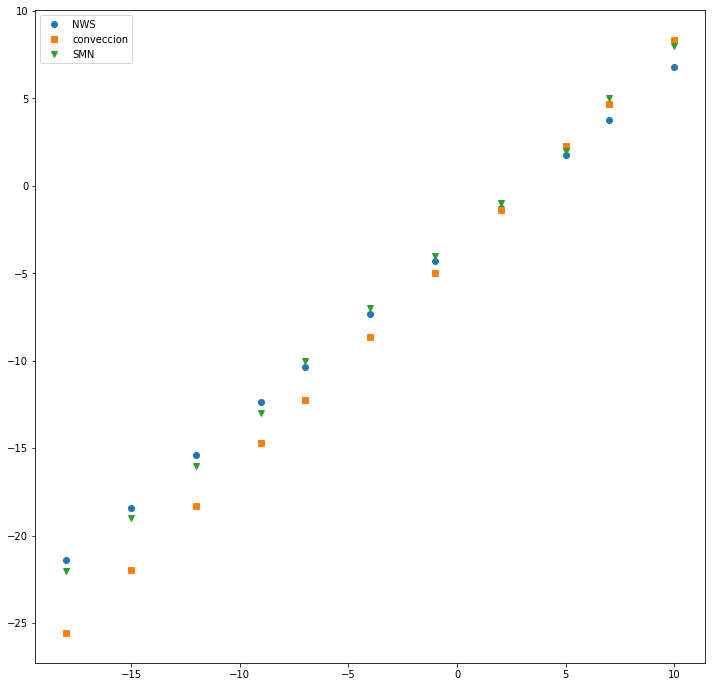

In [55]:
fig,ax = plt.subplots(figsize=(12,12))
ax.plot(temperaturas_base,temps_calc[0],'o',label='NWS')
ax.plot(temperaturas_base,temps_calc[1],'s',label='conveccion')
ax.plot(temperaturas_base,temps,'v',label='SMN')
ax.legend()

In [45]:
temps = data_meteo[3,2:13]  #temperaturas para 12 km/h
temperaturas_base = data_meteo[1,2:13]

In [56]:
temps_st = data_meteo[1:,6]
velocs = data_meteo[1:,1]

In [59]:
temps_calc = np.tile(np.zeros_like(velocs),(2,1))
for i,veloc in enumerate(velocs):
    temp_i = -0
    temps_calc[0,i] = temp_st_calc(veloc,temp_i).magnitude
    velocidad_1 = (veloc*ureg.kilometer_per_hour).to('mph').magnitude
    temperatura_1 = ((temp_i+273)*ureg.kelvin).to('degF').magnitude
    T_st_us  = (temp_st(temperatura_1,velocidad_1)+460)*ureg.rankine
    T_st_us1 = T_st_us.to('degC').magnitude
    temps_calc[1,i]= (T_st_us1)

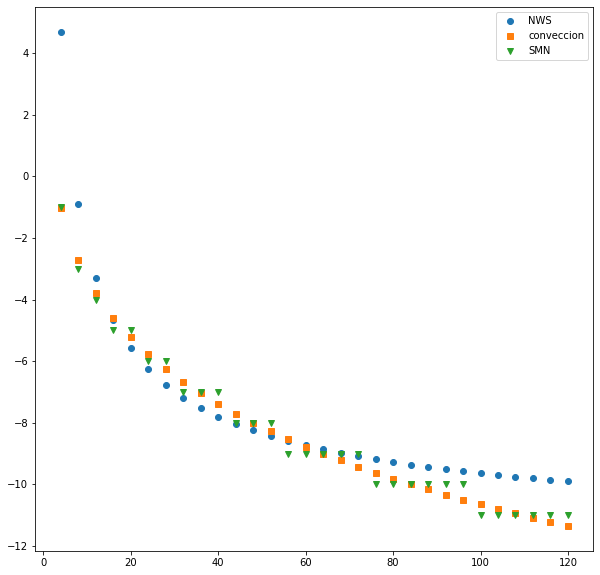

In [60]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(velocs,temps_calc[0],'o',label='NWS')
ax.plot(velocs,temps_calc[1],'s',label='conveccion')
ax.plot(velocs,temps_st,'v',label='SMN')
ax.legend()